<img src="./images/header.png">

***

# Classificação utilizando o método GMMBayes

**Fonte**: https://www.astroml.org/book_figures/chapter10/fig_LINEAR_GMMBayes.html

As curvas de luz estelares geralmente apresentam **formas distintas** (por exemplo, como curvas de luz inclinadas das estrelas ab do tipo RR Lyrae ou estrelas binárias eclipsantes). Além das formas, o **período** e a **amplitude da curva de luz** também representam características distintivas. Com grandes conjuntos de dados, é desejável e muitas vezes inevitável o uso de métodos de aprendizado de máquina para classificação (em oposição à classificação manual/visual). Além das curvas de luz, outros dados, como **cores**, também são usados na classificação.

A amostra de treinamento inclui cinco classes de entrada e os métodos atribuem a classificação mais provável, entre essas cinco classes, a cada objeto que não está na amostra de treinamento (cerca de 4000). Como a classificação visual utilizada como dado de entrada é conhecida por todos os 6.000 objetos, ela pode ser usada para calcular a integridade e a contaminação de métodos automatizados, conforme resumido nas tabelas 10.2.

In [5]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
from astroML.classification import GMMBayes
from sklearn.model_selection import train_test_split
from astroML.datasets import fetch_LINEAR_geneva

In [6]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
# if "setup_text_plots" not in globals():
#     from astroML.plotting import setup_text_plots
# setup_text_plots(fontsize=8, usetex=True)

data = fetch_LINEAR_geneva()

attributes = [('gi', 'logP'),
              ('gi', 'logP', 'ug', 'iK', 'JK', 'amp', 'skew')]
labels = ['$u-g$', '$g-i$', '$i-K$', '$J-K$',
          r'$\log(P)$', 'amplitude', 'skew']
cls = 'LCtype'
Ntrain = 3000

In [7]:
#------------------------------------------------------------
# Create attribute arrays
X = []
y = []

for attr in attributes:
    X.append(np.vstack([data[a] for a in attr]).T)
    LCtype = data[cls].copy()

    # there is no #3.  For a better color scheme in plots,
    # we'll set 6->3
    LCtype[LCtype == 6] = 3
    y.append(LCtype)

In [8]:
#@pickle_results('LINEAR_GMMBayes.pkl')
def compute_SVM_results(i_train, i_test, n_components=5):
    classifiers = []
    predictions = []
    Xtests = []
    ytests = []
    Xtrains = []
    ytrains = []

    for i in range(len(attributes)):
        Xtrain = X[i][i_train]
        Xtest = X[i][i_test]
        ytrain = y[i][i_train]
        ytest = y[i][i_test]

        clf = GMMBayes(n_components, tol=1E-5, covariance_type='full',
                       random_state=0)
        clf.fit(Xtrain, ytrain)
        y_pred = clf.predict(Xtest)

        classifiers.append(clf)
        predictions.append(y_pred)

    return classifiers, predictions

In [15]:
#print(len(data))
i = np.arange(len(data))
i_train, i_test = train_test_split(i, random_state=0, train_size=2000)
clfs, ypred = compute_SVM_results(i_train, i_test)

C:\Users\Willian\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


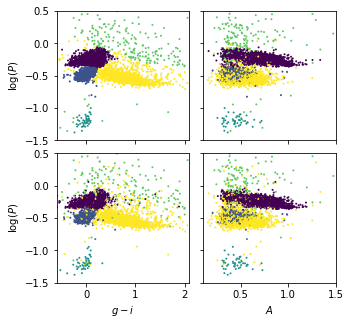

In [11]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

class_labels = []

for i in range(2):
    Xtest = X[i][i_test]
    ytest = y[i][i_test]
    amp = data['amp'][i_test]

    # Plot the resulting classifications
    ax1 = fig.add_subplot(221 + 2 * i)
    ax1.scatter(Xtest[:, 0], Xtest[:, 1],
                c=ypred[i], edgecolors='none', s=4, linewidths=0)

    ax1.set_ylabel(r'$\log(P)$')

    ax2 = plt.subplot(222 + 2 * i)
    ax2.scatter(amp, Xtest[:, 1],
                c=ypred[i], edgecolors='none', s=4, lw=0)

    #------------------------------
    # set axis limits
    ax1.set_xlim(-0.6, 2.1)
    ax2.set_xlim(0.1, 1.5)
    ax1.set_ylim(-1.5, 0.5)
    ax2.set_ylim(-1.5, 0.5)

    ax2.yaxis.set_major_formatter(plt.NullFormatter())
    if i == 0:
        ax1.xaxis.set_major_formatter(plt.NullFormatter())
        ax2.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax1.set_xlabel(r'$g-i$')
        ax2.set_xlabel(r'$A$')

**Descrição:** Classificação supervisionada de estrelas variáveis periódicas do conjunto de dados LINEAR usando um classificador Bayesiano com modelo de mistura gaussiano. A amostra de treinamento inclui cinco classes de entrada. A linha superior mostra clusters derivados usando dois atributos (g - i e  log P) e a linha inferior mostra diagramas análogos para classificação com base em sete atributos (cores u-g, g -i, i - K, and J – K; log P, amplitude da curva de luz, e assimetria da curva de luz). Consulte a Tabela 10.2 para o desempenho da classificação

## Tabela 10.2

A tabela abaixo apresenta dados relacionados à performance da classificação supervisionada usando o classificador de Bayes com Modelo de Mistura Gaussiano. Cada linha corresponde a uma classe de entrada listada na primeira coluna (ab RRL: ab-type RR Lyrae; c RRL: c-type RR Lyrae; EA: Algol-type eclipsing binaries; EB/EW: contact eclipsing binaries; SX Phe: SX Phe and δ Scu candidates). A segunda coluna lista o número de objetos em cada classe de entrada, e as colunas restantes listam a percentagem de fontes classificadas como classes listadas na linha superior. A linha inferior lista a contaminação da classificação em percentagem para cada classe listada na linha superior.

<img src="./images/Table_10_2.png">

**Obs.**: Na primeira linha da tabela acima, acredito que o valor da terceira coluna seja 0.05 ao invés de 0.5. Do jeito que está, a soma desta linha ultrapassa 100%.